<a href="https://colab.research.google.com/github/krameshdn/Dataset/blob/main/11_Dec_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why do we need scaling
Unit and magnitude
If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset, which is not something we want happening in our model.

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

compare age and salary

age salary 
44 90000
 36  55000 
 37 60000 
 25 40000 
 58 300000

Impact of salary is more, Salary dominates the age

used in

Euclidean distance - KNN, Knearst neighbours, neural networks, kmeans clustering
Gradient descent - a parabola - Global minima - Linear regression - faster convergence

No impact

Decision trees (classification)
Random forest
Linear Discriminant , Naive Bayes
Scaling will fasten the process



```
# This is formatted as code
```
Scalars
 - Standard Scalar
  - MinMax Scalar
  -Robust Scalar
Normalizer


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/k_circle_sales.csv')

In [ ]:
#Bigmart sales

In [ ]:
#z- score
#x_scale = (x-mean)/Standard deviation


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [ ]:
num_data=data.select_dtypes(include=np.number)

In [ ]:
num_data.isnull().sum()

Item_Weight                  749
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
Profit                         0
dtype: int64

In [ ]:
num_data['Item_Weight']=num_data['Item_Weight'].fillna(num_data['Item_Weight'].mean())

In [ ]:
num_data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [ ]:
num_data.max()-num_data.min()

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       235.600000
Outlet_Establishment_Year       24.000000
Item_Outlet_Sales            13053.674800
Profit                          23.900000
dtype: float64

STANDARD SCALAR - STANDARDIZATION
X  = (X - MEAN) / STD

In [ ]:
Item_outlet_sales_sc=(num_data['Item_Outlet_Sales'] - num_data['Item_Outlet_Sales'].mean())/num_data['Item_Outlet_Sales'].std()

In [ ]:
Item_outlet_sales_sc

0       0.910548
1      -1.018381
2      -0.049235
3      -0.849053
4      -0.695332
          ...   
8518    0.349894
8519   -0.956346
8520   -0.579066
8521   -0.196713
8522   -0.829545
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
Item_outlet_sales_sc.describe()

count    8.523000e+03
mean    -2.514929e-15
std      1.000000e+00
min     -1.258716e+00
25%     -7.893594e-01
50%     -2.267553e-01
75%      5.391197e-01
max      6.390670e+00
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
round(Item_outlet_sales_sc.mean(),2)

-0.0

In [ ]:
num_data_stdsc=num_data

In [ ]:
for i in num_data.columns:
  num_data_stdsc[i]=(num_data[i] - num_data[i].mean())/num_data[i].std()

In [ ]:
num_data_stdsc.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-8.300583e-14,-3.903653e-15,-6.351784e-15,1.175638e-14,-2.514929e-15,-2.362712e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.116444e+00,-1.281683e+00,-1.762001e+00,-1.532756e+00,-1.258716e+00,-7.823600e+00
25%,-6.573576e-01,-7.586086e-01,-7.581156e-01,-1.293858e+00,-7.893594e-01,-1.554281e-01
50%,-5.119324e-14,-2.364653e-01,2.732434e-02,1.395326e-01,-2.267553e-01,2.852715e-01
75%,7.836040e-01,5.514431e-01,7.171944e-01,7.367785e-01,5.391197e-01,5.203112e-01
max,1.753308e+00,5.082752e+00,2.022246e+00,1.334024e+00,6.390670e+00,6.220025e+00


In [ ]:
#MinMax Scalar - Normalization
# X' = X - min(X) / (Max(X) -  Min(X))

In [ ]:
num_data_mmsc =(num_data['Item_Outlet_Sales']-num_data['Item_Outlet_Sales'].min())/(num_data['Item_Outlet_Sales'].max()-num_data['Item_Outlet_Sales'].min())

In [ ]:
num_data_mmsc.describe()

count    8523.000000
mean        0.164551
std         0.130729
min         0.000000
25%         0.061359
50%         0.134908
75%         0.235030
max         1.000000
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
### ROBUST SCALAR
#IQR = Q3(x) - Q1 (X)
# X' = ( X - MEDIAN(X) ) / ( IQR)

In [ ]:
q1=num_data['Item_Outlet_Sales'].quantile(0.25)
q3=num_data['Item_Outlet_Sales'].quantile(0.75)
iqr=q3-q1
num_data_rs= (num_data['Item_Outlet_Sales']- num_data['Item_Outlet_Sales'].median())/iqr

In [ ]:
num_data_rs.describe()

count    8523.000000
mean        0.170688
std         0.752741
min        -0.776799
25%        -0.423495
50%         0.000000
75%         0.576505
max         4.981204
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_datasc=sc.fit_transform(num_data)
num_datasc=pd.DataFrame(num_datasc,columns=num_data.columns)

In [ ]:
num_datasc.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.430817,-0.970732,1.747685,0.139541,0.910601,-1.125033
1,-1.043488,-0.908111,-1.489032,1.334103,-1.018440,0.520342


In [ ]:
num_datasc.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-5.153946e-16,5.919105e-17,8.336768e-18,-1.139630e-16,1.837997e-17,-1.690801e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.116569e+00,-1.281758e+00,-1.762104e+00,-1.532846e+00,-1.258790e+00,-7.824059e+00
25%,-6.573961e-01,-7.586531e-01,-7.581601e-01,-1.293934e+00,-7.894057e-01,-1.554372e-01
50%,3.101412e-14,-2.364792e-01,2.732594e-02,1.395408e-01,-2.267687e-01,2.852882e-01
75%,7.836500e-01,5.514755e-01,7.172365e-01,7.368218e-01,5.391513e-01,5.203418e-01
max,1.753411e+00,5.083050e+00,2.022364e+00,1.334103e+00,6.391045e+00,6.220390e+00


In [ ]:
orginal_data=sc.inverse_transform(num_datasc)
orginal_data=pd.DataFrame(orginal_data,columns=num_datasc.columns)

In [ ]:
orginal_data=num_data

In [ ]:
orginal_data.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.430791,-0.970675,1.747582,0.139533,0.910548,-1.124967
1,-1.043426,-0.908058,-1.488944,1.334024,-1.018381,0.520311
2,1.055484,-0.956861,0.009656,0.139533,-0.049235,0.637831
3,1.363614,-1.281683,0.660174,0.020083,-0.849053,0.108992
4,-0.497855,-1.281683,-1.398996,-1.293858,-0.695332,0.402791


In [ ]:
num_data.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.430791,-0.970675,1.747582,0.139533,0.910548,-1.124967
1,-1.043426,-0.908058,-1.488944,1.334024,-1.018381,0.520311
2,1.055484,-0.956861,0.009656,0.139533,-0.049235,0.637831
3,1.363614,-1.281683,0.660174,0.020083,-0.849053,0.108992
4,-0.497855,-1.281683,-1.398996,-1.293858,-0.695332,0.402791


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
numdata_mm=mm.fit_transform(num_data)
num_datamm=pd.DataFrame(numdata_mm,columns=num_data.columns)


In [ ]:
num_datamm.min()

Item_Weight                  0.0
Item_Visibility              0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Item_Outlet_Sales            0.0
Profit                       0.0
dtype: float64

In [ ]:
num_datamm.max()

Item_Weight                  1.0
Item_Visibility              1.0
Item_MRP                     1.0
Outlet_Establishment_Year    1.0
Item_Outlet_Sales            1.0
Profit                       1.0
dtype: float64

In [ ]:
o_data=mm.inverse_transform(num_datamm)
o_data=pd.DataFrame(o_data,columns=num_datamm.columns)

In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-8.300583e-14,-3.903653e-15,-6.351784e-15,1.175638e-14,-2.514929e-15,-2.362712e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.116444e+00,-1.281683e+00,-1.762001e+00,-1.532756e+00,-1.258716e+00,-7.823600e+00
25%,-6.573576e-01,-7.586086e-01,-7.581156e-01,-1.293858e+00,-7.893594e-01,-1.554281e-01
50%,-5.119324e-14,-2.364653e-01,2.732434e-02,1.395326e-01,-2.267553e-01,2.852715e-01
75%,7.836040e-01,5.514431e-01,7.171944e-01,7.367785e-01,5.391197e-01,5.203112e-01
max,1.753308e+00,5.082752e+00,2.022246e+00,1.334024e+00,6.390670e+00,6.220025e+00


In [ ]:
o_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-8.300319e-14,-3.889350e-15,-6.349022e-15,1.173696e-14,-2.522315e-15,-2.383168e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.116444e+00,-1.281683e+00,-1.762001e+00,-1.532756e+00,-1.258716e+00,-7.823600e+00
25%,-6.573576e-01,-7.586086e-01,-7.581156e-01,-1.293858e+00,-7.893594e-01,-1.554281e-01
50%,-5.112583e-14,-2.364653e-01,2.732434e-02,1.395326e-01,-2.267553e-01,2.852715e-01
75%,7.836040e-01,5.514431e-01,7.171944e-01,7.367785e-01,5.391197e-01,5.203112e-01
max,1.753308e+00,5.082752e+00,2.022246e+00,1.334024e+00,6.390670e+00,6.220025e+00


In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
numdata_rs=rs.fit_transform(num_data)
numdata_rs=pd.DataFrame(numdata_rs,columns=num_data.columns)

In [ ]:
numdata_rs.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,-2.142413e-14,0.180501,-0.018521,-0.068714,0.170688,-0.422162
std,6.939810e-01,0.763329,0.677824,0.492456,0.752741,1.479861
min,-1.468772e+00,-0.797844,-1.212847,-0.823529,-0.776799,-12.000000
25%,-4.561937e-01,-0.398567,-0.532390,-0.705882,-0.423495,-0.652174
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.438063e-01,0.601433,0.467610,0.294118,0.576505,0.347826
max,1.216762e+00,4.060311,1.352205,0.588235,4.981204,8.782609


In [ ]:
o_datars=mm.inverse_transform(numdata_rs)
o_datars=pd.DataFrame(o_datars,columns=numdata_rs.columns)

In [ ]:
#feature selection 
# dropping a column
# F1 - F2 > 75%

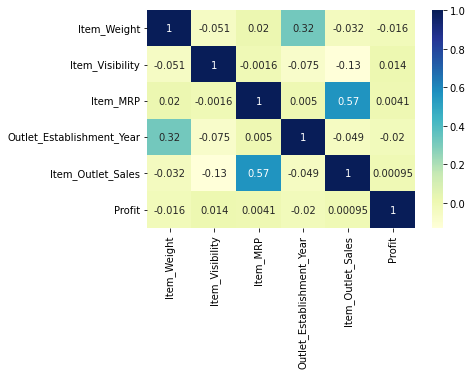

In [ ]:
dataplot=sb.heatmap(numdata_rs.corr(),cmap="YlGnBu",annot=True)

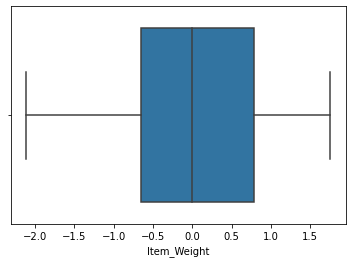

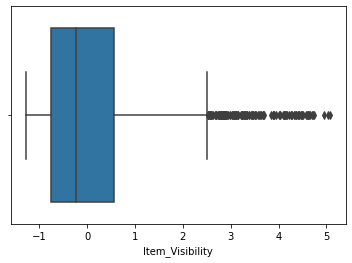

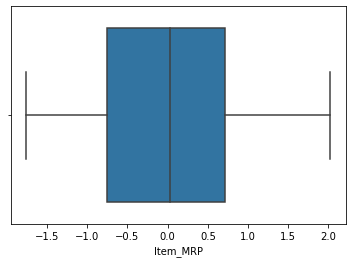

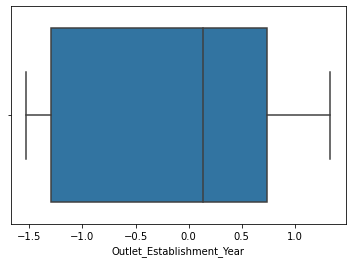

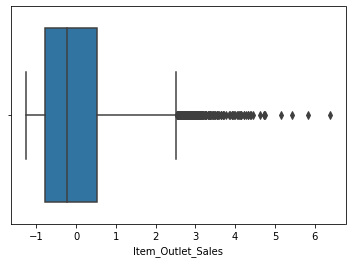

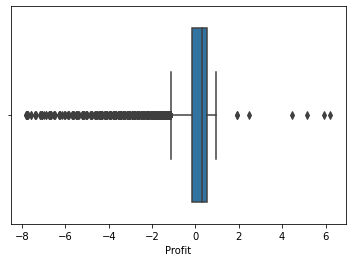

In [ ]:
for i in num_data.columns:
  sb.boxplot(num_data[i])
  plt.show()

In [ ]:
num_datamm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.546920,0.201382,0.465615,0.534661,0.164551,0.557093
std,0.258414,0.157123,0.264253,0.348823,0.130729,0.071207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377049,0.082187,0.265280,0.083333,0.061359,0.546025
50%,0.546920,0.164228,0.472835,0.583333,0.134908,0.577406
75%,0.749415,0.288026,0.655136,0.791667,0.235030,0.594142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


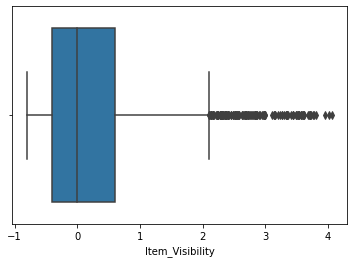

In [ ]:
sb.boxplot(numdata_rs['Item_Visibility'])

Item_Weight


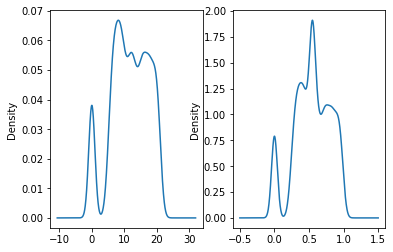

Item_Visibility


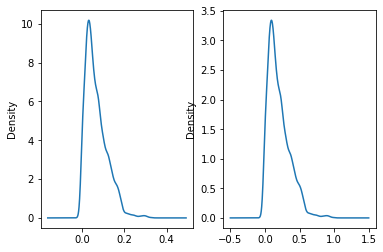

Item_MRP


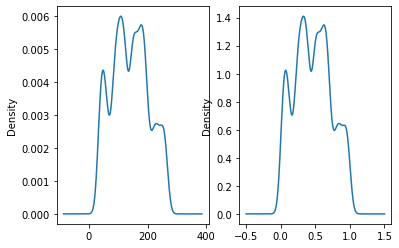

Outlet_Establishment_Year


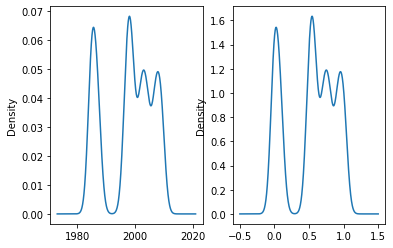

Item_Outlet_Sales


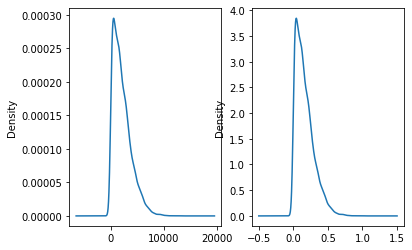

Profit


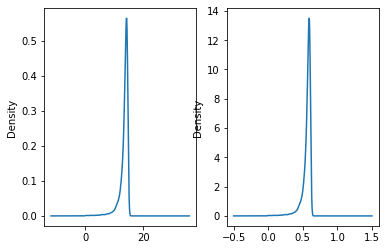

In [ ]:
for i in num_data.columns:
  print(i)
  plt.subplot(1,2,1)
  num_data[i].plot(kind='kde')
  plt.subplot(1,2,2)
  num_datamm[i].plot(kind='kde')
  plt.show()

In [ ]:
#normalizer
#works on observation
#entire feature

In [ ]:
from sklearn.preprocessing import Normalizer
normalize=Normalizer()
num_datanorm=normalize.fit_transform(num_data)
num_datanorm=pd.DataFrame(num_datanorm,columns=num_data.columns)

Item_Weight


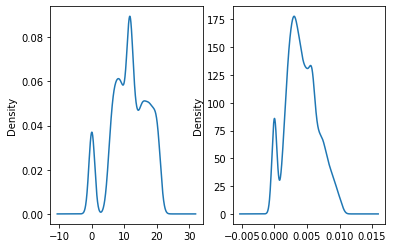

Item_Visibility


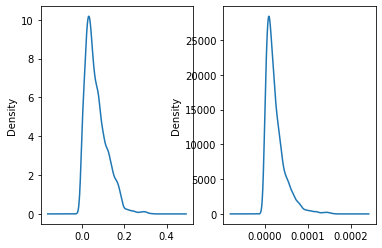

Item_MRP


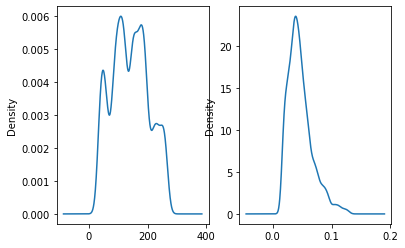

Outlet_Establishment_Year


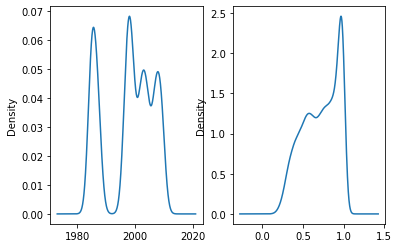

Item_Outlet_Sales


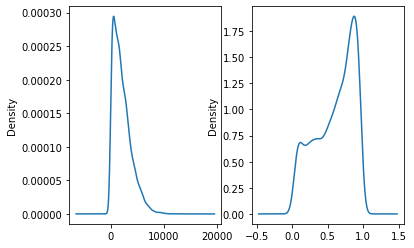

Profit


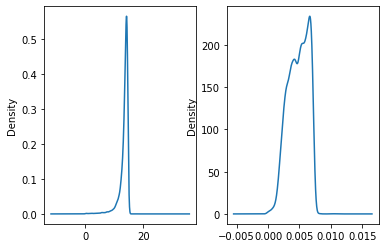

In [ ]:
for i in num_data.columns:
  print(i)
  plt.subplot(1,2,1)
  num_data[i].plot(kind='kde')
  plt.subplot(1,2,2)
  num_datanorm[i].plot(kind='kde')
  plt.show()

In [ ]:
num_datanorm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.004189,0.000024,0.046621,0.716082,0.602572,0.004807
std,0.002391,0.000023,0.020940,0.216582,0.273091,0.001585
min,0.000000,0.000000,0.013603,0.149939,0.016657,0.000031
25%,0.002523,0.000009,0.031903,0.540934,0.384746,0.003559
50%,0.003953,0.000018,0.042677,0.743505,0.666504,0.004953
75%,0.005815,0.000033,0.056588,0.922373,0.839675,0.006183
max,0.010624,0.000161,0.131172,0.999701,0.988535,0.011045
